In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd 

In [32]:
import tensorflow as tf

In [54]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
X= data.iloc[:, :-1].values #independent variables
Y= data.iloc[:, -1].values #dependent  or target variables(Iris species)

In [35]:
print(data)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [36]:
data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [37]:
data.describe

<bound method NDFrame.describe of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [42]:
import numpy as np


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
data.shape

(150, 6)

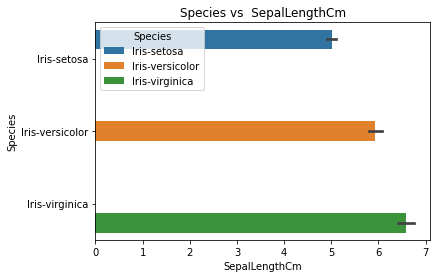

In [52]:
# EDA
plt.title("Species vs  SepalLengthCm")
sns.barplot(data = data, x= "SepalLengthCm", y= "Species", hue = "Species")

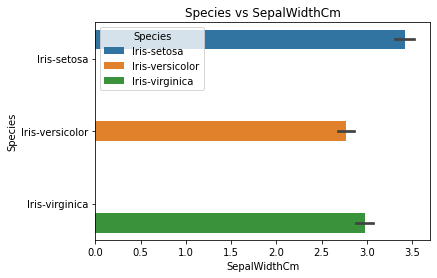

In [56]:
plt.title("Species vs SepalWidthCm")
sns.barplot(data = data, x= "SepalWidthCm", y= "Species", hue = "Species")

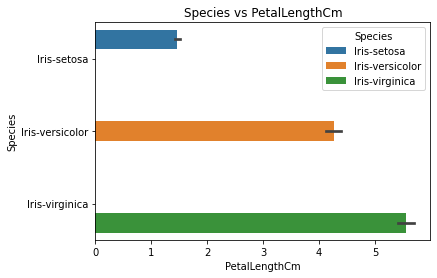

In [57]:
plt.title("Species vs PetalLengthCm")
sns.barplot(data = data, x= "PetalLengthCm", y= "Species", hue = "Species")

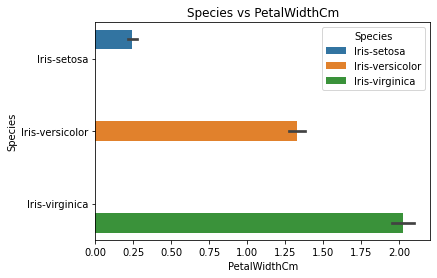

In [58]:
plt.title("Species vs PetalWidthCm")
sns.barplot(data = data, x= "PetalWidthCm", y= "Species", hue = "Species")

In [61]:
# splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [63]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [66]:
# training the decision tree model on the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, Y_train)
 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [67]:
#Predicting Prediction Class
print(classifier.predict(sc.transform([[1, 5.1, 3.5, 1.4, 0.2]])))

['Iris-setosa']


In [68]:
# Predicting result indivdually
Y_pred = classifier.predict(X_test)

In [69]:
# making the confusion matrix "Accuracy"
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print("Accuracy: {:.2f}%".format(accuracy_score(Y_test, Y_pred)*100))


Accuracy: 100.00%


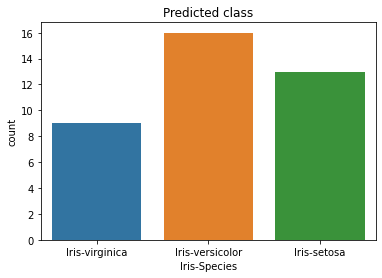

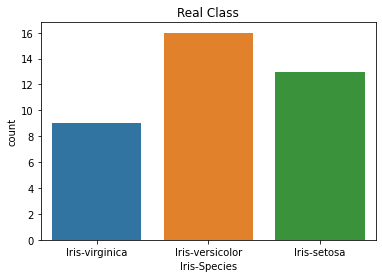

In [71]:
# Visualising the real class vs Predicted class
sns.countplot(Y_pred, data = data)
plt.title("Predicted class")
plt.xlabel("Iris-Species")
plt.show()
sns.countplot(Y_test, data=data)
plt.title("Real Class")
plt.xlabel("Iris-Species")
plt.show()